In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import joblib


In [7]:
import subprocess
import sys

subprocess.check_call([sys.executable, "-m", "pip", "install", "catboost"])

0

In [8]:
df=pd.read_csv(r"E:\Capstone Project 2 using vs code\diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,81.0,0,1,never,25.19,6.6,141,0
1,Female,54.0,0,1,No Info,27.32,6.6,81,0
2,Male,28.0,0,1,never,27.32,5.7,158,0
3,Female,36.0,0,1,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,21.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,81.0,0,1,No Info,27.32,6.2,91,0
99996,Female,2.0,0,1,No Info,17.37,6.5,111,0
99997,Male,66.0,0,1,former,27.83,5.7,155,0
99998,Female,24.0,0,1,never,35.42,4.0,111,0


Checkinh Null

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Checking Duplicate

In [10]:
df.duplicated().sum()

np.int64(4504)

In [11]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,81.0,0,1,never,25.19,6.6,141,0
1,Female,54.0,0,1,No Info,27.32,6.6,81,0
2,Male,28.0,0,1,never,27.32,5.7,158,0
3,Female,36.0,0,1,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,21.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,1,No Info,24.60,4.8,145,0
99996,Female,2.0,0,1,No Info,17.37,6.5,111,0
99997,Male,66.0,0,1,former,27.83,5.7,155,0
99998,Female,24.0,0,1,never,35.42,4.0,111,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [13]:
#chk for balancing or unbalanced data
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

<Axes: xlabel='diabetes', ylabel='Count'>

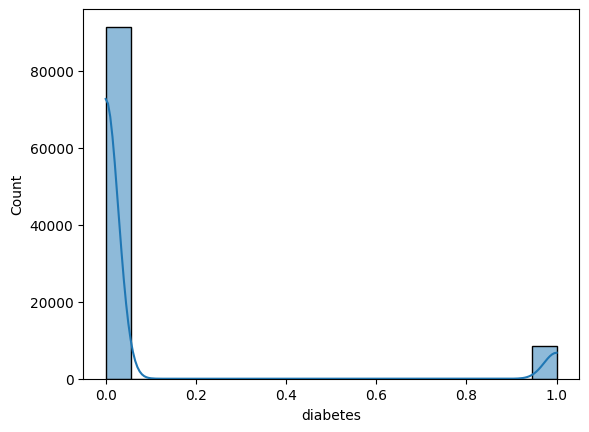

In [14]:
sns.histplot(df,x='diabetes',kde=True)

Outlayers

<Axes: ylabel='diabetes'>

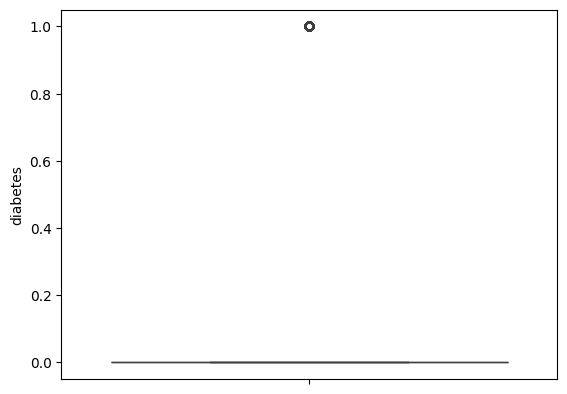

In [15]:
sns.boxplot(df.diabetes)

In [16]:
#Loop through all columns in the DataFrame and apply LabelEncoder to Categorical columns
label_encoder=LabelEncoder()
for column in df.select_dtypes(include=["object"]).columns:
  df[column]=label_encoder.fit_transform(df[column])
#Display the Dataframe with encoded columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [17]:
#step 3 split the dataset into training and testing
X=df.drop('diabetes',axis=1) #independent variable columns
y=df['diabetes'] #Outcome dependent variable

In [18]:
# Assume you have features X and target y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale features before SMOTE if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print class distribution before and after
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({0: 73208, 1: 6792})
After SMOTE: Counter({0: 73208, 1: 73208})


In [19]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.8849


In [20]:
#step 4:Create an ML Model using Logistic Regression Algorithm
model=LogisticRegression()
# Now x_train contains only numerical data because preprocessing was done before the split
model.fit(X_train_res,y_train_res)
y_predict1=model.predict(X_test)
y_predict1

array([0, 0, 0, ..., 0, 1, 0])

SVR

In [21]:
model = SGDRegressor()
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)

Random Forest

In [22]:
rfc=RandomForestClassifier()
rfc.fit(X_train_res,y_train_res)
#step 4: Model Evaluation
y_pred=rfc.predict(X_test)
y_pred
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)
classification_rep=classification_report(y_test,y_pred)
print("classification rep:\n",classification_rep)

accuracy: 0.96145
classification rep:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     18292
           1       0.79      0.75      0.77      1708

    accuracy                           0.96     20000
   macro avg       0.88      0.87      0.87     20000
weighted avg       0.96      0.96      0.96     20000



Catboost

In [23]:
#Create catboot classifer
catboost_model=CatBoostClassifier()
#Train the model
catboost_model.fit(X_train_res,y_train_res)
#Make Predictions
catboost_predictions=catboost_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, catboost_predictions))
print("Classification Report:\n", classification_report(y_test, catboost_predictions))

Learning rate set to 0.086624
0:	learn: 0.4964121	total: 233ms	remaining: 3m 52s
1:	learn: 0.3711544	total: 269ms	remaining: 2m 14s
2:	learn: 0.3061078	total: 296ms	remaining: 1m 38s
3:	learn: 0.2637309	total: 318ms	remaining: 1m 19s
4:	learn: 0.2456165	total: 335ms	remaining: 1m 6s
5:	learn: 0.2257245	total: 347ms	remaining: 57.5s
6:	learn: 0.2131161	total: 359ms	remaining: 50.9s
7:	learn: 0.2033938	total: 370ms	remaining: 45.9s
8:	learn: 0.1932980	total: 381ms	remaining: 42s
9:	learn: 0.1885658	total: 392ms	remaining: 38.8s
10:	learn: 0.1824437	total: 403ms	remaining: 36.3s
11:	learn: 0.1758198	total: 414ms	remaining: 34.1s
12:	learn: 0.1700524	total: 426ms	remaining: 32.4s
13:	learn: 0.1654342	total: 439ms	remaining: 30.9s
14:	learn: 0.1609330	total: 451ms	remaining: 29.6s
15:	learn: 0.1555688	total: 462ms	remaining: 28.4s
16:	learn: 0.1520275	total: 474ms	remaining: 27.4s
17:	learn: 0.1462052	total: 486ms	remaining: 26.5s
18:	learn: 0.1448990	total: 496ms	remaining: 25.6s
19:	learn

XGBOOST

In [24]:
#create XGBoost regressor
xgboost_model=xgb.XGBClassifier()
#Train the model
xgboost_model.fit(X_train_res,y_train_res)
#Make predictions
xgboost_predictions=xgboost_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, xgboost_predictions))
print("Classification Report:\n", classification_report(y_test, xgboost_predictions))

Accuracy: 0.9698
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.91      0.71      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.94      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



LIGHTGBM

In [25]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_res, y_train_res)
y_pred = lgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 73208, number of negative: 73208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 146416, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.97075
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.70      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



C:\Users\vrbk2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


ANN

In [26]:
#Initialising the ANN
classifier=Sequential()

In [27]:
#Adding the input layer and first hidden layer
classifier.add(Dense(units=13))#Unit is known as Feature we want to 14-1=13

In [28]:
#Adding the first hidden layer and second hidden layer
classifier.add(Dense(units=6,activation="relu"))
classifier.add(Dense(units=10,activation="relu"))

In [29]:
#Adding output layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [30]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [31]:
model_history = classifier.fit(X_train_res, y_train_res, validation_split=0.30, batch_size=32, epochs=10) #validation means random traning 30% data

Epoch 1/10
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8733 - loss: 0.3038 - val_accuracy: 0.7846 - val_loss: 0.4171
Epoch 2/10
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9022 - loss: 0.2111 - val_accuracy: 0.8091 - val_loss: 0.3611
Epoch 3/10
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9083 - loss: 0.1967 - val_accuracy: 0.7930 - val_loss: 0.3771
Epoch 4/10
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9087 - loss: 0.1925 - val_accuracy: 0.8185 - val_loss: 0.3376
Epoch 5/10
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9081 - loss: 0.1912 - val_accuracy: 0.8091 - val_loss: 0.3554
Epoch 6/10
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9096 - loss: 0.1883 - val_accuracy: 0.8195 - val_loss: 0.3359
Epoch 7/10
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9079 - loss: 0.1894 - val_accuracy: 0.8324 - val_loss: 0.3185
Epoch 8/10
3203/3203 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9101 - loss: 0.1875 

Predict and Evaluation

In [32]:
#Part 3-Making the predictions and evaluating the model
#Predicting the test set result
y_pred=classifier.predict(X_test)
y_pred_thresholded=(y_pred>0.5).astype(int)#Thershold value 0.5 (greater than 0.5 yes and less means no) & test data has run 100 times

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


In [33]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
df=confusion_matrix(y_test,y_pred_thresholded)
df
#Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred_thresholded)
score

0.93755

In [34]:
X_train.shape

(80000, 8)

Layers

In [35]:
model1=Sequential()
model1.add(Dense(units=64,input_dim= X_train_res.shape[1]))
model1.add(LeakyReLU(alpha=0.01))
model1.add(Dropout(0.3))
model1.add(Dense(units=32))
model1.add(LeakyReLU(alpha=0.01))
model1.add(Dropout(0.3))
model1.add(Dense(units=16))
model1.add(LeakyReLU(alpha=0.01))
model1.add(Dropout(0.3))
model1.add(Dense(units=1,activation='sigmoid'))
optimizer=Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
#train the model
model=model1.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100


C:\Users\vrbk2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\vrbk2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9137 - loss: 0.2228 - val_accuracy: 0.9603 - val_loss: 0.1117
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9597 - loss: 0.1196 - val_accuracy: 0.9638 - val_loss: 0.1020
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9629 - loss: 0.1082 - val_accuracy: 0.9665 - val_loss: 0.0954
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9654 - loss: 0.1022 - val_accuracy: 0.9691 - val_loss: 0.0925
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9679 - loss: 0.0961 - val_accuracy: 0.9694 - val_loss: 0.0897
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9693 - loss: 0.0915 - val_accuracy: 0.9707 - val_loss: 0.0877
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9694 - loss: 0.0903 - val_accuracy: 0.9704 - val_loss: 0.0875
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9698 - loss: 0.0908 - val_

In [36]:
y_pred=model1.predict(X_test)
y_pred_thresholded=(y_pred>0.5).astype(int)
#making the confusion matrix
from sklearn.metrics import confusion_matrix
df=confusion_matrix(y_test,y_pred_thresholded)
df
#Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred_thresholded)
score

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step


0.97215

In [37]:
#model_history=classifier.fit(x_train,y_train,batch_size=10,epochs=100)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor="loss",patience=5,restore_best_weights=True)
classifier.fit(X_train,y_train,epochs=10,callbacks=[early_stopping])

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9632 - loss: 0.1031
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9653 - loss: 0.0984
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9648 - loss: 0.0994
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9653 - loss: 0.0990
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9649 - loss: 0.1006
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9669 - loss: 0.0978
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9668 - loss: 0.0963
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9671 - loss: 0.0955
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9676 - loss: 0.0943
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9696 - loss: 0.0892


In [40]:
import joblib
joblib.dump(model, 'diabetes_model.pkl')


['diabetes_model.pkl']

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_thresholded)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred_thresholded)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred_thresholded)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred_thresholded)
print(f"F1 Score: {f1:.4f}")

# ROC-AUC (use raw probabilities from model1.predict)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Accuracy: 0.9721
Precision: 0.9991
Recall: 0.6745
F1 Score: 0.8053
ROC-AUC Score: 0.9769


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import joblib

# Load data
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save encoders
joblib.dump(label_encoders, "label_encoders.pkl")

X = df.drop('diabetes', axis=1)
y = df['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build ANN model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Save model
model.save("diabetes_ann_model.h5")


Epoch 1/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9501 - loss: 0.1485
Epoch 2/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9643 - loss: 0.1035
Epoch 3/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9676 - loss: 0.0942
Epoch 4/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9691 - loss: 0.0910
Epoch 5/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9694 - loss: 0.0906
Epoch 6/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9703 - loss: 0.0874
Epoch 7/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9700 - loss: 0.0872
Epoch 8/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9704 - loss: 0.0864
Epoch 9/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9714 - loss: 0.0841
Epoch 10/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9711 - loss: 0.0851
Epoch 11/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9699 - loss: 0.0882
Epoch 12/100
5000/5

In [ ]:
python train_model.py